In [45]:
pip install statsmodels


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



  Obtaining dependency information for statsmodels from https://files.pythonhosted.org/packages/52/fc/4c0e654ab177558a657eaba369e5a25fbf700f95f1d122f6c083525d58c4/statsmodels-0.14.1-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for patsy>=0.5.4 from https://files.pythonhosted.org/packages/43/f3/1d311a09c34f14f5973bb0bb0dc3a6e007e1eda90b5492d082689936ca51/patsy-0.5.6-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB 660.6 kB/s eta 0:00:15
   - -------------------------------------- 0.4/9.8 MB 4.5 MB/s eta 0:00:03
   ----- ---------------------------------- 1.2/9.8 MB 9.7 MB/s eta 0:00:01
   -------- ------------------------------- 2.0/9.8 MB 11.5 MB/s eta 0:00:01
   --------- ------------------------------ 2.3/9.8 MB 11.0 MB/s eta 0:00:01
   ---------- ----------------------------- 2.6/9.8 MB 10.2 MB/s eta 0:00:01
   ------------ --------------------------- 2.

In [2]:
pip install missingno 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import requests 
import json 
import pandas as pd
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from kmodes.kprototypes import KPrototypes

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
from statsmodels.graphics.mosaicplot import mosaic
from pandas.plotting import parallel_coordinates




from sklearn.metrics import silhouette_score


from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("C:\\Users\\Lenovo\\PycharmProjects\\pythonProject1\\Reputation System\\filecoin_messages_cleaned_jan22jan24_compiled1.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2656000 entries, 0 to 2655999
Data columns (total 19 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                object 
 1   sender_account      object 
 2   sender_address      object 
 3   sender_type         object 
 4   receiver_account    object 
 5   receiver_address    object 
 6   receiver_type       object 
 7   method_id           int64  
 8   method_name         object 
 9   refundDecimal       float64
 10  refund              float64
 11  amountDecimal       float64
 12  burnedDecimal       float64
 13  overEstimationBurn  float64
 14  baseFeeBurn         float64
 15  success             bool   
 16  minerPenalty        float64
 17  minerTip            float64
 18  exitCode            int64  
dtypes: bool(1), float64(8), int64(2), object(8)
memory usage: 367.3+ MB


In [3]:
df.columns

Index(['date', 'sender_account', 'sender_address', 'sender_type',
       'receiver_account', 'receiver_address', 'receiver_type', 'method_id',
       'method_name', 'refundDecimal', 'refund', 'amountDecimal',
       'burnedDecimal', 'overEstimationBurn', 'baseFeeBurn', 'success',
       'minerPenalty', 'minerTip', 'exitCode'],
      dtype='object')

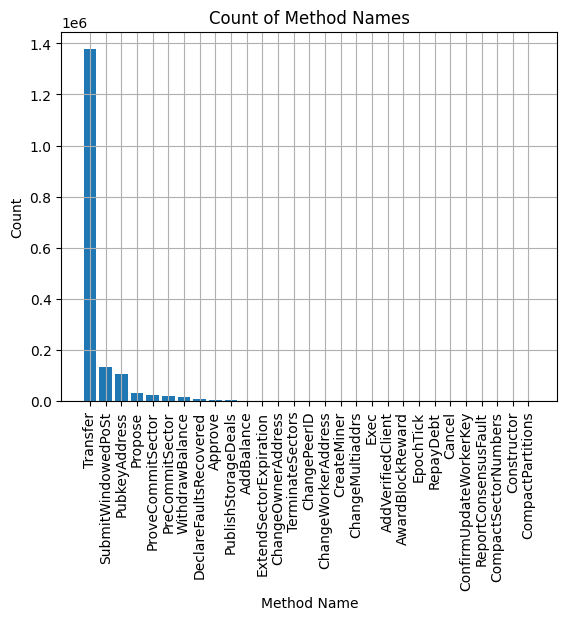

In [4]:

method_counts = df['method_name'].value_counts()

# Create a bar chart
plt.bar(method_counts.index, method_counts.values)

# Add labels and title
plt.xlabel('Method Name')
plt.ylabel('Count')
plt.title('Count of Method Names')
plt.grid()

# Show the plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()


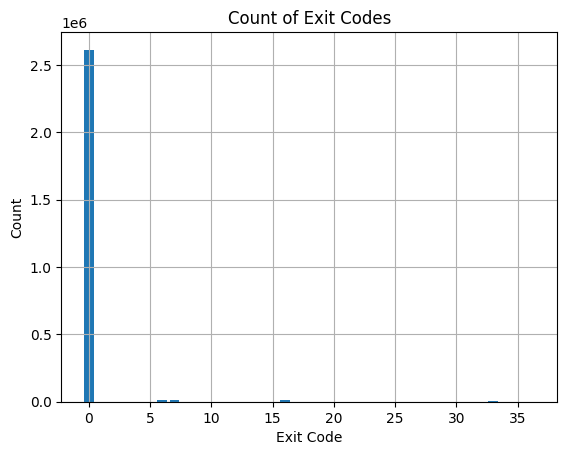

In [5]:
exit_code_counts = df['exitCode'].value_counts()


plt.bar(exit_code_counts.index, exit_code_counts.values)


plt.xlabel('Exit Code')
plt.ylabel('Count')
plt.title('Count of Exit Codes')
plt.grid()


plt.show()

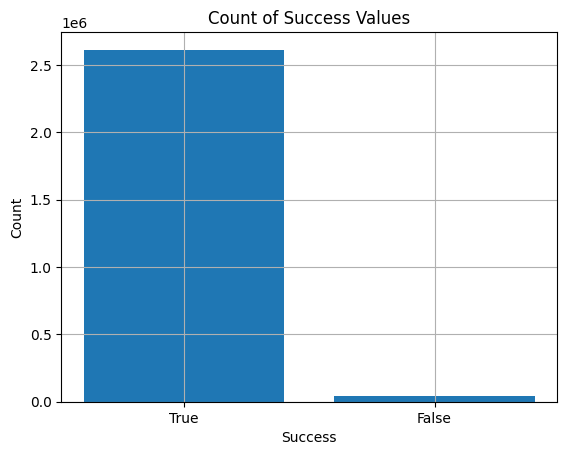

In [6]:

success_counts = df['success'].value_counts()


plt.bar(success_counts.index.astype(str), success_counts.values)


plt.xlabel('Success')
plt.ylabel('Count')
plt.title('Count of Success Values')
plt.grid()

plt.show()


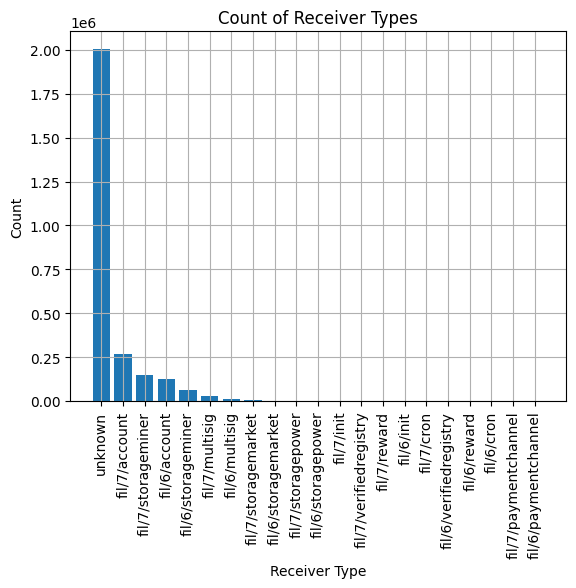

In [7]:
receiver_type_counts = df['receiver_type'].value_counts()


plt.bar(receiver_type_counts.index, receiver_type_counts.values)


plt.xlabel('Receiver Type')
plt.ylabel('Count')
plt.title('Count of Receiver Types')
plt.grid()

plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

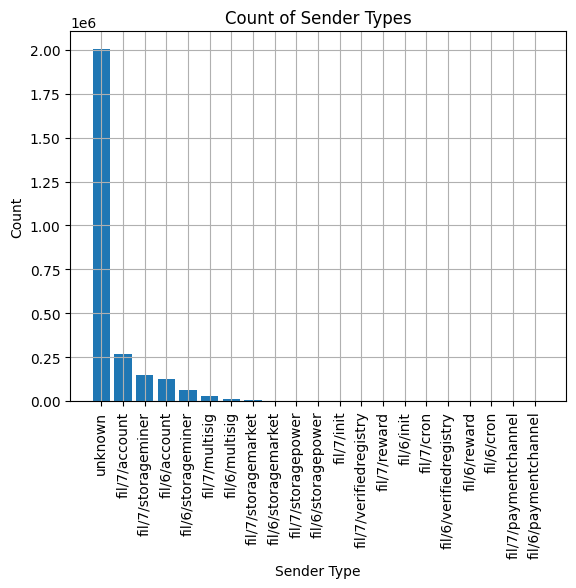

In [8]:
sender_type_counts = df['sender_type'].value_counts()


plt.bar(receiver_type_counts.index, receiver_type_counts.values)


plt.xlabel('Sender Type')
plt.ylabel('Count')
plt.title('Count of Sender Types')
plt.grid()

plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

In [11]:
contingency_table = pd.crosstab(df['receiver_type'], df['success'])

# Perform chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

# Check if the relationship is statistically significant
alpha = 0.05
if p < alpha:
    print("There is a significant relationship between 'receiver_type' and 'success'.")
else:
    print("There is no significant relationship between 'receiver_type' and 'success'.")

Chi-squared value: 4882.046149410899
P-value: 0.0
There is a significant relationship between 'receiver_type' and 'success'.


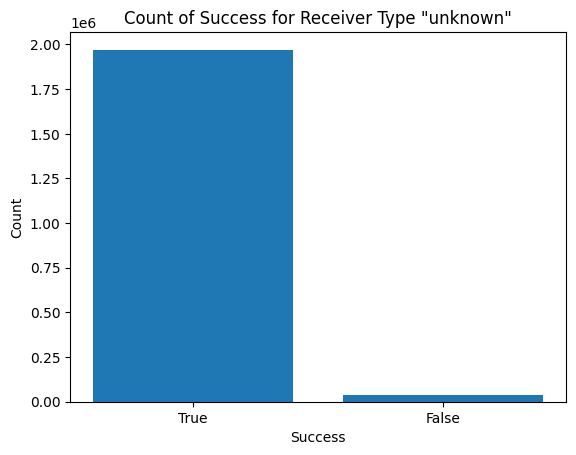

In [12]:
unknown_receiver_type = df[df['receiver_type'] == 'unknown']

# Group by 'success' and count occurrences
grouped_counts = unknown_receiver_type['success'].value_counts()

# Plot the bar chart
plt.bar(grouped_counts.index.astype(str), grouped_counts.values)

# Add labels and title
plt.xlabel('Success')
plt.ylabel('Count')
plt.title('Count of Success for Receiver Type "unknown"')

# Show the plot
plt.show()

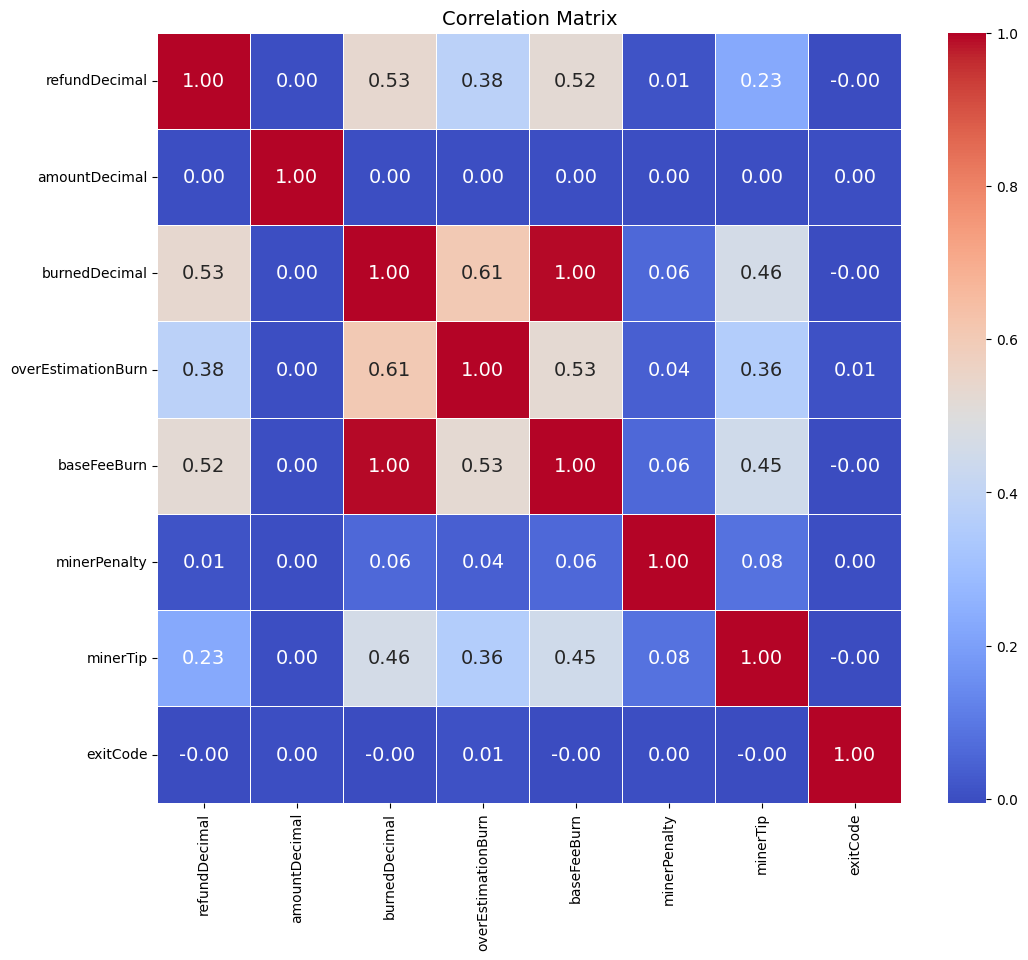

In [13]:
df['success'] = df['success'].astype(int)
corrdf = df.drop(columns=['date', 'sender_account', 'sender_address', 'sender_type', 'receiver_account', 'receiver_address', 'receiver_type', 'method_name', 'method_id', 'success', 'refund'])
correlation_matrix = corrdf.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 14})

plt.title('Correlation Matrix', fontsize=14)
plt.show()


In [14]:
#df_encoded.info()
null_values = df.isnull().sum()

# Display the count of null values for each column
print(null_values)

date                       0
sender_account             0
sender_address             0
sender_type                0
receiver_account        2289
receiver_address           0
receiver_type              0
method_id                  0
method_name           925348
refundDecimal              0
refund                     0
amountDecimal              0
burnedDecimal              0
overEstimationBurn         0
baseFeeBurn                0
success                    0
minerPenalty               0
minerTip                   0
exitCode                   0
dtype: int64


In [15]:
numerical_features = ['refund', 'refundDecimal', 'amountDecimal', 'burnedDecimal', 'overEstimationBurn', 'baseFeeBurn', 'minerPenalty', 'minerTip']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [16]:
df["amountDecimal"].head

<bound method NDFrame.head of 0          8.707997e-07
1          7.272510e-06
2          5.608440e-10
3          5.803177e-07
4          2.245339e-06
               ...     
2655995    0.000000e+00
2655996    2.290429e-09
2655997    2.446795e-07
2655998    2.277544e-09
2655999    0.000000e+00
Name: amountDecimal, Length: 2656000, dtype: float64>

In [17]:
df.shape

(2656000, 19)

In [18]:


# Your original filtering code
filtered_df = df[(df['success'] == True) & (df['minerPenalty'] == 0)]

# Specify the number of records to remove
num_records_to_remove = 2500000  # Replace with your desired number

# Check if the specified number is greater than the available records
if num_records_to_remove >= len(filtered_df):
    print("Number of records to remove exceeds or is equal to the available records.")
    # Handle this case as needed
else:
    # Randomly select indices to remove
    indices_to_remove = np.random.choice(filtered_df.index, size=num_records_to_remove, replace=False)

    # Create a new DataFrame with the dropped rows
    dropped_rows_df = df.loc[indices_to_remove]

    # Drop the selected indices from the original DataFrame
    filtered_df = df.drop(indices_to_remove)

    # Save the dropped rows DataFrame to a CSV file
    dropped_rows_df.to_csv('dropped_rows.csv', index=False)
    filtered_df.to_csv('used_rows.csv', index=False)


# Display information about the filtered DataFrame
filtered_df.shape
dropped_rows_df.shape


(2500000, 19)

In [19]:
filtered_df.shape

(156000, 19)

In [20]:
num_df=filtered_df.drop(columns=['date','sender_account','sender_address','sender_type','receiver_account','receiver_address','receiver_type','method_name','refundDecimal'])


In [ ]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [ ]:
hopkins(num_df)

In [21]:
num_df.columns


Index(['method_id', 'refund', 'amountDecimal', 'burnedDecimal',
       'overEstimationBurn', 'baseFeeBurn', 'success', 'minerPenalty',
       'minerTip', 'exitCode'],
      dtype='object')